In [1]:
# K-Means
from sklearn import cluster

In [34]:
import pandas as pd

In [3]:
import spacy

nlp = spacy.load('en_core_web_lg')

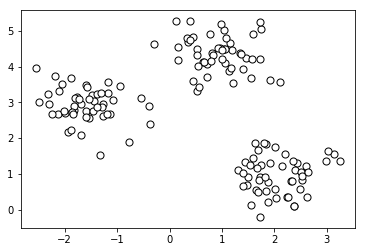

In [4]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [5]:

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [12]:
X.shape

(150, 2)

In [13]:
y_km.shape

(150,)

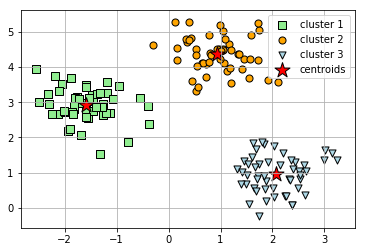

In [6]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

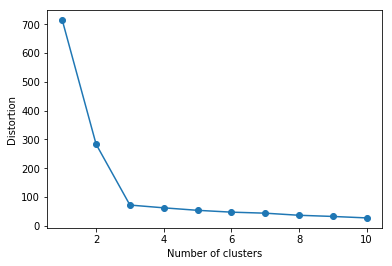

In [7]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
import json
  
# Opening JSON file
f = open('atepc_inference.result.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  

f.close()

In [16]:
len(data)

1000

In [24]:
data[3]

{'sentence': 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it .',
 'IOB': ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 'tokens': ['Stopped',
  'by',
  'during',
  'the',
  'late',
  'May',
  'bank',
  'holiday',
  'off',
  'Rick',
  'Steve',
  'recommendation',
  'and',
  'loved',
  'it',
  '.'],
 'aspect': [],
 'position': [],
 'sentiment': [],
 'probs': [],
 'confidence': []}

In [29]:
all_aspects = []
all_sentiments = []
for sentence in data[:10]:
    if sentence['aspect'] != []:
        all_aspects.append(sentence['aspect'])
        all_sentiments.append(sentence['sentiment'])

In [30]:
list(zip(all_aspects,all_sentiments))

[(['place'], ['Positive']),
 (['Crust'], ['Negative']),
 (['texture'], ['Negative']),
 (['selection', 'menu', 'prices'], ['Neutral', 'Neutral', 'Positive']),
 (['pho'], ['Negative']),
 (['potatoes'], ['Negative']),
 (['fries'], ['Positive']),
 (['touch'], ['Positive'])]

In [32]:
all_aspects = []
all_sentiments = []
all_ids = []
for index, sentence in enumerate(data[:10]):
    num_aspects = len(sentence['aspect'])
    if num_aspects != 0:
        all_aspects+=sentence['aspect']
        all_sentiments+=sentence['sentiment']
        all_ids+=[index]*num_aspects

In [35]:
sentiments = list(zip(all_ids, all_aspects,all_sentiments))

In [36]:
df_sentiments = pd.DataFrame(sentiments, columns =['sentence_id', 'phrase', 'sentiment'])


In [37]:
df_sentiments

,sentence_id,phrase,sentiment
0,0,place,Positive
1,1,Crust,Negative
2,2,texture,Negative
3,4,selection,Neutral
4,4,menu,Neutral
5,4,prices,Positive
6,5,pho,Negative
7,7,potatoes,Negative
8,8,fries,Positive
9,9,touch,Positive


In [ ]:
# https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook
# https://nbviewer.org/github/LucasTurtle/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
# https://towardsdatascience.com/how-to-create-and-deploy-a-machine-learning-app-to-heroku-d6965aa4f627